# Ensemble Clasifier

In [129]:
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout
from keras.layers import MaxPooling2D,Flatten
from keras.callbacks import ModelCheckpoint,TensorBoard
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils import np_utils

import itertools
import os
import matplotlib.pyplot as plt


In [130]:
os.getcwd()

'C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project'

## Import data

In [131]:
ytrain = pd.read_csv('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Color quant\\ytrain.csv')
ytest = pd.read_csv('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Color quant\\ytest.csv')

# CNN
CNNtrain = np.load('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Final results\\CNNTrainScores.npy')
CNNtest = np.load('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Final results\\CNNTestScores.npy')

# Random Forest
RFtrain = np.load('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Final results\\RandomForestScores.npy')
RFtest = np.load('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Final results\\RandomForestTestScores.npy')

AllTrain = np.concatenate((CNNtrain[0:900] , RFtrain),axis=1)
ytrain = np.array(ytrain)[:,1].astype(int)

AllTest = np.concatenate((CNNtest , RFtest),axis=1)
ytest = np.array(ytest)[:,1].astype(int)

## Dividing Training Data in Training and Cross-Validation

In [132]:
X_train, X_val, y_train, y_val = train_test_split(
    AllTrain, ytrain, test_size=0.2, random_state=7)

## Multinomial Logistic Regression

In [133]:
# Train multinomial logistic regression model
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
mul_lr.fit(X_train, y_train)
    
print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, mul_lr.predict(X_train)))
print ("Multinomial Logistic regression Val Accuracy :: ", metrics.accuracy_score(y_val, mul_lr.predict(X_val)))

Multinomial Logistic regression Train Accuracy ::  0.9958333333333333
Multinomial Logistic regression Val Accuracy ::  1.0


## SVM

In [134]:
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)  

print ("SVM Train Accuracy :: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print ("SVM Val Accuracy :: ", metrics.accuracy_score(y_val, clf.predict(X_val)))

SVM Train Accuracy ::  0.9958333333333333
SVM Val Accuracy ::  1.0


## Neural Network

In [135]:
#Number of classes 
n = 7

#One hot label encoder
enc = LabelEncoder()
enc.fit(np.arange(1,n+1))
enc.transform(np.arange(1,n+1))
train_labels = enc.transform(y_train)
train_labels = np_utils.to_categorical(train_labels)


model = Sequential()

model.add(Dense(10, activation='relu', input_dim=14))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-3),
              metrics=['accuracy'])

batch_size = 132
epoch = 50

filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_acc',mode='max',
                            save_best_only=True,verbose=1)

callback_list = [checkpoint]

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                150       
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 77        
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________
None


In [136]:
H = model.fit(np.array(X_train),train_labels,
             batch_size=batch_size,epochs = epoch,verbose=1,
             callbacks=callback_list,validation_split=0.20)

Train on 576 samples, validate on 144 samples
Epoch 1/50
576/576 [==============================] - 0s 474us/step - loss: 1.9486 - acc: 0.0781 - val_loss: 1.9298 - val_acc: 0.0625

Epoch 00001: val_acc improved from -inf to 0.06250, saving model to weights.hdf5
Epoch 2/50
576/576 [==============================] - 0s 22us/step - loss: 1.9302 - acc: 0.0816 - val_loss: 1.9112 - val_acc: 0.0625

Epoch 00002: val_acc did not improve from 0.06250
Epoch 3/50
576/576 [==============================] - 0s 23us/step - loss: 1.9125 - acc: 0.0938 - val_loss: 1.8928 - val_acc: 0.0764

Epoch 00003: val_acc improved from 0.06250 to 0.07639, saving model to weights.hdf5
Epoch 4/50
576/576 [==============================] - 0s 21us/step - loss: 1.8951 - acc: 0.1146 - val_loss: 1.8746 - val_acc: 0.1667

Epoch 00004: val_acc improved from 0.07639 to 0.16667, saving model to weights.hdf5
Epoch 5/50
576/576 [==============================] - 0s 24us/step - loss: 1.8777 - acc: 0.1476 - val_loss: 1.8562 - v


Epoch 00040: val_acc did not improve from 0.77083
Epoch 41/50
576/576 [==============================] - 0s 21us/step - loss: 1.0810 - acc: 0.7361 - val_loss: 1.0083 - val_acc: 0.7778

Epoch 00041: val_acc improved from 0.77083 to 0.77778, saving model to weights.hdf5
Epoch 42/50
576/576 [==============================] - 0s 23us/step - loss: 1.0594 - acc: 0.7517 - val_loss: 0.9862 - val_acc: 0.7847

Epoch 00042: val_acc improved from 0.77778 to 0.78472, saving model to weights.hdf5
Epoch 43/50
576/576 [==============================] - 0s 24us/step - loss: 1.0379 - acc: 0.7674 - val_loss: 0.9648 - val_acc: 0.7986

Epoch 00043: val_acc improved from 0.78472 to 0.79861, saving model to weights.hdf5
Epoch 44/50
576/576 [==============================] - 0s 21us/step - loss: 1.0170 - acc: 0.7691 - val_loss: 0.9435 - val_acc: 0.8125

Epoch 00044: val_acc improved from 0.79861 to 0.81250, saving model to weights.hdf5
Epoch 45/50
576/576 [==============================] - 0s 23us/step - los

In [137]:
NNTrainPred = model.predict_classes(X_train) + 1
NNValPred = model.predict_classes(X_val) + 1

print ("NN Train Accuracy :: ", metrics.accuracy_score(y_train, NNTrainPred))
print ("NN Val Accuracy :: ", metrics.accuracy_score(y_val, NNValPred))

NN Train Accuracy ::  0.8208333333333333
NN Val Accuracy ::  0.7777777777777778


## Results

Confusion matrix, without normalization
[[21  5  2  0  9  2  2]
 [ 9  6  2  0  3  0  3]
 [ 1  1 52  1  4  2  0]
 [ 1  0  5  4  2  1  2]
 [ 6  0  5  0 26  1  5]
 [ 2  3  6  0  4  3  2]
 [ 9  1  3  0  8  1  1]]
Normalized confusion matrix
[[0.51 0.12 0.05 0.   0.22 0.05 0.05]
 [0.39 0.26 0.09 0.   0.13 0.   0.13]
 [0.02 0.02 0.85 0.02 0.07 0.03 0.  ]
 [0.07 0.   0.33 0.27 0.13 0.07 0.13]
 [0.14 0.   0.12 0.   0.6  0.02 0.12]
 [0.1  0.15 0.3  0.   0.2  0.15 0.1 ]
 [0.39 0.04 0.13 0.   0.35 0.04 0.04]]


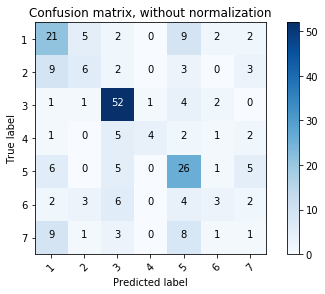

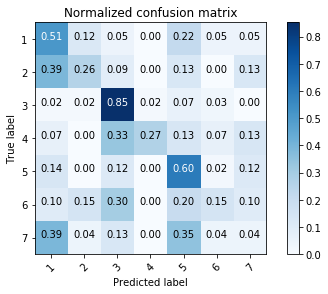

In [139]:
y_pred = clf.predict(AllTest)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# y_pred = model2.predict_classes(np.array(Xtrain_feat))
class_names = np.array(['1','2','3','4','5','6','7'])
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## ROC curve

Area under the curve for class 1 : 0.7613711272247857


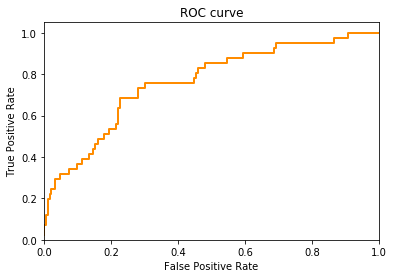

Area under the curve for class 2 : 0.7260655386592418


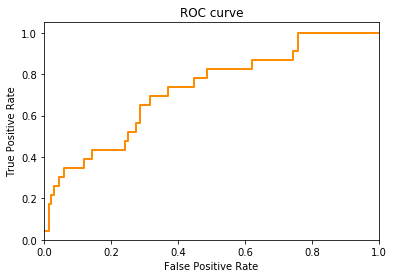

Area under the curve for class 3 : 0.9052160953800298


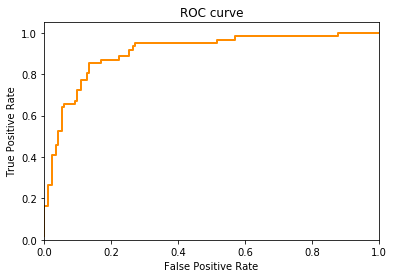

Area under the curve for class 4 : 0.7232227488151659


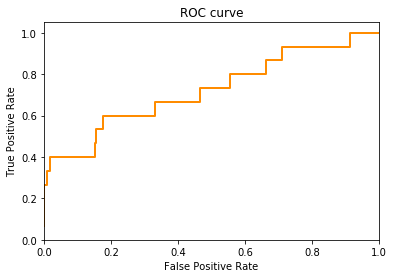

Area under the curve for class 5 : 0.8031516075740246


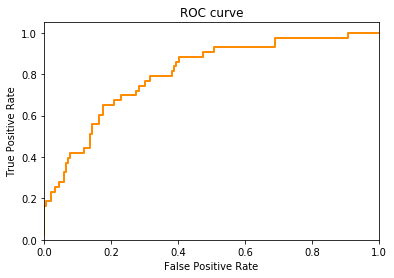

Area under the curve for class 6 : 0.6339805825242719


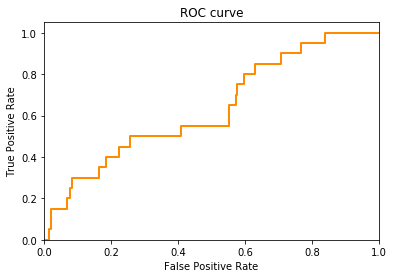

Area under the curve for class 7 : 0.6650246305418719


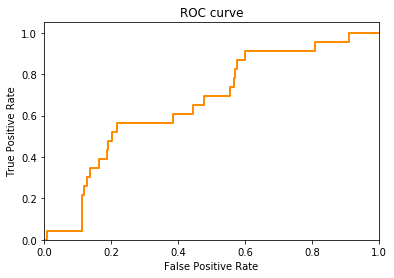

In [140]:
y_pred_sco = clf.predict_proba(AllTest)
plt.figure()

AUCs = []

for i in range(1,8):
    
    y_temp = (ytest == i).astype(int)
    sco_temp = np.array([y_pred_sco[:,i-1] , 1-y_pred_sco[:,i-1]]).T
    fpr, tpr, thres = roc_curve(y_temp, sco_temp[:,0])
    
    print('Area under the curve for class',i,':',auc(fpr, tpr))
    
    AUCs.append(auc(fpr, tpr))
    
    plt.plot(fpr, tpr, color='darkorange',lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()

In [141]:
print('Final result. Average AUCs for test data: ', np.mean(AUCs))

Final result. Average AUCs for test data:  0.7454331901027702


In [19]:
import pickle

SVMmodel = 'EnsembleSVM.pkl'
SVM = open(SVMmodel,'wb')
pickle.dump(clf,SVM)

SVM.close()